# Quiz 04
## Using Zonal Statistics to Evaluate Air Quality during the Woolsey Fire

In previous assignments you have worked with Sentinel-2 data. Today you will work with a different satellite in the Sentinel cluster: Sentinel 5P. One calculated parameter from Sentinel-5p is something call the Aerosol Index. The Aerosol Index (AI) is a qualitative index indicating the presence of elevated layers of aerosols with significant absorption. The main aerosol types that cause signals detected in the AI are desert dust, biomass burning and volcanic ash plumes. An advantage of the AI is that it can be derived for clear as well as (partly) cloudy ground pixels.

Let's revisit some air quality data from November 9th, 2018 - the day after the Woolsey fire started. You are provided the AI from Sentinel-5P (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) for the following area of interest:

![_._](data/aoi.png)


Complete and answer the following questions:
1. Load the AI data for November 9th, 2018 (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) and visualize, including a colormap. What patterns do you see?
2. Select two areas within the above area of interest box which is roughly around LA county. For example, we used the cities of Topanga and San Fernando in class last week. Select two different cities of your choice, and retrieve their geometries using the ```osmnx``` package. If you're not familiar with city names in LA county, go to Google Maps. 
3. Plot the retrieved polygons over the AI data to make sure both are within bounds of the AI data.
4. Calculate the zonal statistics of both cities you selected, and display the max AI values for both cities. Which city had the higher AI? Does this coincide with what you visually observe?

In [1]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline
# File path
ai_fp = os.path.join("data", "2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff")

# Read the data
ai = rasterio.open(ai_fp)


/Users/brpagan/anaconda3/envs/traillop/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/brpagan/anaconda3/envs/traillop/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS t

In [4]:
# Keywords in such format that they can be found from OSM
topanga_q = "Topanga, California, United States of America"
san_fernando_q = "San Fernando, California, United States of America"

# Retrieve the geometries of those areas using osmnx
topanga = ox.geocode_to_gdf(topanga_q)
san_fernando = ox.geocode_to_gdf(san_fernando_q)

# Reproject to same coordinate system as the 
topanga = topanga.to_crs(crs=ai.crs)
san_fernando = san_fernando.to_crs(crs=ai.crs)

type(san_fernando)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

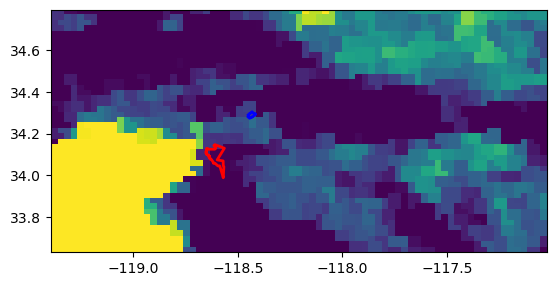

In [6]:
# Plot the Polygons on top of the DEM
ax = topanga.plot(facecolor='None', edgecolor='red', linewidth=2)
ax = san_fernando.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=2)

# Plot DEM
show((ai, 1), ax=ax)

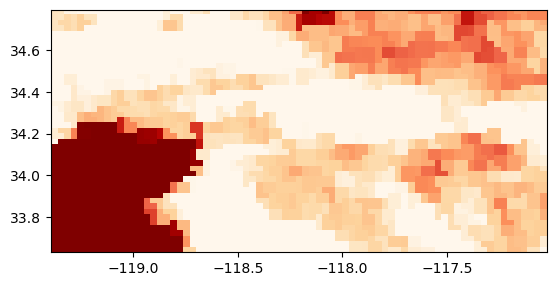

<AxesSubplot:>

In [10]:
show(ai,cmap='OrRd')

In [14]:
# Read the raster values
array = ai.read(1)

# Get the affine
affine = ai.transform
# Calculate zonal statistics for Topanga
zs_topanga = zonal_stats(topanga, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for Long Beach
zs_san_fernando = zonal_stats(san_fernando, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])


/opt/tljh/user/lib/python3.9/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [15]:
print(zs_topanga)
print(zs_san_fernando)

[{'min': 0.0, 'max': 37.0, 'mean': 10.666666666666666, 'median': 0.0, 'majority': 0.0}]
[{'min': 51.0, 'max': 51.0, 'mean': 51.0, 'median': 51.0, 'majority': 51.0}]
